In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 0.9, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_flat+increase'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

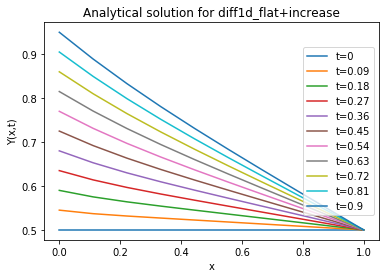

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## Newton-CG (default)

In [7]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'Newton-CG'
options = {}
options['disp'] = True
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

         Current function value: 0.254150
         Iterations: 149
         Function evaluations: 244
         Gradient evaluations: 9159
         Hessian evaluations: 0
17min 8s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 0.2541501820522319
     jac: array([-1.44076360e-04, -8.01073282e-04,  2.44513967e-04,  1.82488174e-03,
        2.12964394e-03,  1.73946365e-04,  6.60295097e-04, -7.98163328e-05,
        1.85241528e-04, -2.38011954e-03,  1.66310328e-05, -1.68149510e-03,
        1.70973225e-03,  3.71577369e-03,  3.99514928e-03,  7.35130880e-05,
        9.73247382e-04, -5.56308697e-04, -3.05852432e-05, -3.55864636e-03,
        1.59345764e-04, -2.08799434e-03,  1.05358122e-03,  3.53349665e-03,
        4.54131423e-03, -5.07149586e-04,  1.01564237e-03, -6.36851882e-04,
       -6.16175052e-05, -3.44033036e-03, -6.15569255e-04, -1.08782929e-03,
       -1.30543141e-04, -1.58052673e-03, -2.95084190e-03,  5.15492125e-04,
       -1.10434380e-03,  2.86985680e-04,  5.075400

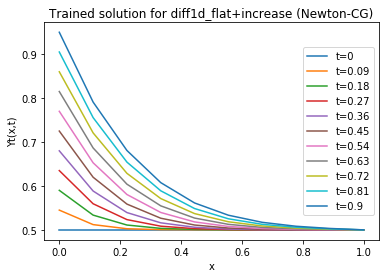

In [8]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

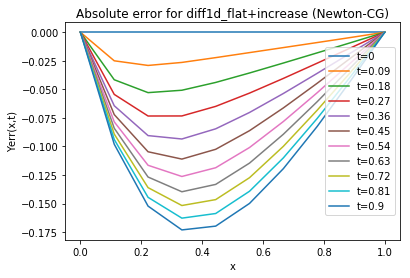

In [9]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

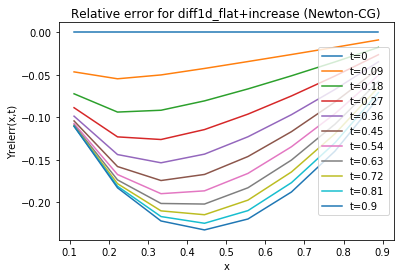

In [10]:
Yrelerr1 = (Yt1[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));